# Preprocessing & EDA
## Dependency
**Note**: To run this notebook, the following packages should be installed
- nltk
- pandas
- matplotlib
- seaborn
- scikit-learn
- wordcloud

I have successfully tested the notebook in Python 3.7+, it should also work in other Python3.x environment

## Overview
The following preprocessing steps are conducted to perform a low-level processing and visualisation of text (especially the job description section) in the provided JSON file

<ol>
    <li>Clean text
        <ul>
            <li> Clean HTML tags
            <li> Remove all special characters
            <li> Clean formatting
        </ul>
    <li> Tokenize
         <ul>
             <li> Sentence tokenization
             <li> Word tokenization
             <li> Stop word removal
        </ul>
    <li> Lemmatization
    <li> POS Tagging Analysis
         <ul>
             <li> Identify the POS of interest
             <li> POS category counting
         </ul>
    <li> Create one large corpus for analysis
    <li> Counts
         <ul>
             <li> Word Count w/ visualization
             <li> Sentence Count w/ visualization
        </ul>
    <li> Frequent Words (N-Grams)
         <ul>
             <li> BiGrams
             <li> TriGrams
        </ul>
</ol>

In [ ]:
# install required packages
!pip install -r requirements.txt

In [2]:
import re, string
import nltk
from nltk import sent_tokenize, word_tokenize, WordNetLemmatizer, pos_tag
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# config sns and matploblib fonts
sns.set()
# used for better images
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


# download required files for use with relevant models
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

F:\Program_Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
F:\Program_Files\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://num

True

## Load data

First load the JSON file, then convert it to dataframe for ease of data analysis

In [3]:
import json
import pandas as pf
from pandas import json_normalize

# read text data from .json file
txt_data = open("./ads-50k.json", "r", encoding="UTF-8")
lines = txt_data.readlines()
# number of lines
print(f'the json file contains {len(lines)} ads')

# convert to dataframe
ads =[json.loads(line) for line in lines]
df = json_normalize(ads)
df.head()

the json file contains 50000 ads


,id,title,abstract,content,metadata.standout.bullet1,metadata.standout.bullet2,metadata.standout.bullet3,metadata.additionalSalaryText,metadata.classification.name,metadata.subClassification.name,metadata.location.name,metadata.workType.name,metadata.area.name,metadata.suburb.name
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,Join a Sector that is considered Recession Pro...,Excellent opportunity for Career Progression ...,Make a Diference whilst earning Money and havi...,commission,Education & Training,Other,Sydney,Full Time,NaN,NaN
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,NaN,NaN,NaN,Attractive Commission - Uncapped Earning Poten...,Retail & Consumer Products,Retail Assistants,Melbourne,Casual/Vacation,Northern Suburbs,Coburg
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"Design, develop, test and deliver custom softw...",Keep your skills current with 20 x paid profes...,Flexible & inclusive work environment,NaN,Information & Communication Technology,Consultants,Adelaide,Full Time,NaN,NaN
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,NaN,NaN,NaN,$140k + Car Park - Call James Calleja 0430 058...,Real Estate & Property,"Commercial Sales, Leasing & Property Mgmt",Melbourne,Full Time,CBD & Inner Suburbs,Melbourne
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,Lead overarching strategy around Technology wi...,You will be responsible for all Technology and...,Competitive Salary package of $110K - $120K + ...,$110k - $120k p.a. + Numerous Perks!,Information & Communication Technology,Management,Auckland,Full Time,NaN,NaN


We use the first ad in the JSON file as an example to show the data and our preprocessing steps listed above.   


In [4]:
# load the first ad
data = json.loads(lines[0])
for field in data:
    print(field)
    print(data[field])

id
38915469
title
Recruitment Consultant
abstract
We are looking for someone to focus purely on recruiting Permanent staff within a buoyant Early Childhood Educaton Sector.
content
<HTML><p>Are you looking to join a thriving business that will reward your hard work whilst you make a difference to Children’s lives?</p><p><strong>The Role:</strong> We are looking for someone to focus purely on recruiting Permanent staff in the Early Childhood Educaton Sector. The role will include:</p><ul><li>Building relationships with range of existing and prospective clients</li><li>Identify their issues and help provide the solution</li><li>Attending client visits and understanding client requirements</li><li>Representing Pulse Child Care Crew as an ambassador at career fairs and other external events</li><li>Managing recruitment processes to deliver monthly targets</li><li>Developing and executing your own candidate development strategy</li><li>Coordinating resources to ensure all vacancies are prop

As the detailed job description is in "content" field, we only process this field to extract the required information

In [5]:
raw_doc = data['content']
raw_doc

'<HTML><p>Are you looking to join a thriving business that will reward your hard work whilst you make a difference to Children’s lives?</p><p><strong>The Role:</strong> We are looking for someone to focus purely on recruiting Permanent staff in the Early Childhood Educaton Sector. The role will include:</p><ul><li>Building relationships with range of existing and prospective clients</li><li>Identify their issues and help provide the solution</li><li>Attending client visits and understanding client requirements</li><li>Representing Pulse Child Care Crew as an ambassador at career fairs and other external events</li><li>Managing recruitment processes to deliver monthly targets</li><li>Developing and executing your own candidate development strategy</li><li>Coordinating resources to ensure all vacancies are properly worked</li></ul><p> </p><p><strong>The Benefits</strong></p><ul><li>Competitive salary and commission structure, with uncapped earning potential.</li><li>Have your experience 

We first clean the text, then tokenize the text into sentences and tokenize each sentence into words.

## Clean text
As the job description is in HTML format, we need to define text cleaning function to remove HTML tags, symbols that controls the HTML style, and other irrelevant characters

In [6]:
def clean_text(text):
    # remove html tags with '<>'
    text_no_html_tag = re.sub(r'</?\w+[^>]*>', '\n', text)
    # remove html style symobols starting with '&' or bullet point
    text_no_special_html_label = re.sub(r'\&\w+;|#\w*|\@\w*|\d\.\s+|•\s+|[A-Z]\.\s+|[IVX]+\.\s+', '.', text_no_html_tag)
    # remove http links
    text_no_link = re.sub(r'http:\/\/.*|https:\/\/.*', '', text_no_special_html_label)
    # remove extra space
    cleaned_text = re.sub(r'\s+', ' ', text_no_link)
    # remove brackets
    cleaned_text = cleaned_text.replace('[', '')
    cleaned_text = cleaned_text.replace(']', '')
    cleaned_text = cleaned_text.replace(')', '')
    cleaned_text = cleaned_text.replace('(', '')
    return cleaned_text

In [7]:
clean_doc = clean_text(raw_doc)
clean_doc

' Are you looking to join a thriving business that will reward your hard work whilst you make a difference to Children’s lives? The Role: We are looking for someone to focus purely on recruiting Permanent staff in the Early Childhood Educaton Sector. The role will include: Building relationships with range of existing and prospective clients Identify their issues and help provide the solution Attending client visits and understanding client requirements Representing Pulse Child Care Crew as an ambassador at career fairs and other external events Managing recruitment processes to deliver monthly targets Developing and executing your own candidate development strategy Coordinating resources to ensure all vacancies are properly worked The Benefits Competitive salary and commission structure, with uncapped earning potential. Have your experience and successes recognised as a key player of the business. Everyone is heard and encouraged to offer opinions. Regular Incentives including all-exp

## Tokenization
Tokenize the detailed job description into sentences and tokenize each sentence into words. In this process, the punctuations will be removed. You may also ignore the stop words

In [8]:
# tokenise text into sentences
def split_sents(text):
    sentences = [sent for sent in sent_tokenize(text)]
    return sentences

sentences = split_sents(clean_doc)
sentences

[' Are you looking to join a thriving business that will reward your hard work whilst you make a difference to Children’s lives?',
 'The Role: We are looking for someone to focus purely on recruiting Permanent staff in the Early Childhood Educaton Sector.',
 'The role will include: Building relationships with range of existing and prospective clients Identify their issues and help provide the solution Attending client visits and understanding client requirements Representing Pulse Child Care Crew as an ambassador at career fairs and other external events Managing recruitment processes to deliver monthly targets Developing and executing your own candidate development strategy Coordinating resources to ensure all vacancies are properly worked The Benefits Competitive salary and commission structure, with uncapped earning potential.',
 'Have your experience and successes recognised as a key player of the business.',
 'Everyone is heard and encouraged to offer opinions.',
 'Regular Incenti

In [9]:
doc_tokens = []
def split_words(sentences):
    token_words = []
    for sen in sentences:
        # remove punctuation
        sen = sen.translate(str.maketrans('', '', string.punctuation))
        tokens = [word.lower() for word in word_tokenize(sen)]
        # # word token without stop
        # tokens_without_stop = [word for word in tokens if word not in STOP]
        for word in tokens:
            token_words.append(word)

    return token_words

def tokenize_doc(text):
    sentences = split_sents(text)
    token_words = split_words(sentences)

    return token_words

doc_tokens = tokenize_doc(clean_doc)
doc_tokens

['are',
 'you',
 'looking',
 'to',
 'join',
 'a',
 'thriving',
 'business',
 'that',
 'will',
 'reward',
 'your',
 'hard',
 'work',
 'whilst',
 'you',
 'make',
 'a',
 'difference',
 'to',
 'children',
 '’',
 's',
 'lives',
 'the',
 'role',
 'we',
 'are',
 'looking',
 'for',
 'someone',
 'to',
 'focus',
 'purely',
 'on',
 'recruiting',
 'permanent',
 'staff',
 'in',
 'the',
 'early',
 'childhood',
 'educaton',
 'sector',
 'the',
 'role',
 'will',
 'include',
 'building',
 'relationships',
 'with',
 'range',
 'of',
 'existing',
 'and',
 'prospective',
 'clients',
 'identify',
 'their',
 'issues',
 'and',
 'help',
 'provide',
 'the',
 'solution',
 'attending',
 'client',
 'visits',
 'and',
 'understanding',
 'client',
 'requirements',
 'representing',
 'pulse',
 'child',
 'care',
 'crew',
 'as',
 'an',
 'ambassador',
 'at',
 'career',
 'fairs',
 'and',
 'other',
 'external',
 'events',
 'managing',
 'recruitment',
 'processes',
 'to',
 'deliver',
 'monthly',
 'targets',
 'developing',
 'a

## Remove stop words

In [10]:
# Set stopwords for English
stop_words = set(stopwords.words('english'))

def stopword_removal(text):
    cleaned = [word for word in text if word not in stop_words]
    return cleaned

clean_word = stopword_removal(doc_tokens)
clean_word

['looking',
 'join',
 'thriving',
 'business',
 'reward',
 'hard',
 'work',
 'whilst',
 'make',
 'difference',
 'children',
 '’',
 'lives',
 'role',
 'looking',
 'someone',
 'focus',
 'purely',
 'recruiting',
 'permanent',
 'staff',
 'early',
 'childhood',
 'educaton',
 'sector',
 'role',
 'include',
 'building',
 'relationships',
 'range',
 'existing',
 'prospective',
 'clients',
 'identify',
 'issues',
 'help',
 'provide',
 'solution',
 'attending',
 'client',
 'visits',
 'understanding',
 'client',
 'requirements',
 'representing',
 'pulse',
 'child',
 'care',
 'crew',
 'ambassador',
 'career',
 'fairs',
 'external',
 'events',
 'managing',
 'recruitment',
 'processes',
 'deliver',
 'monthly',
 'targets',
 'developing',
 'executing',
 'candidate',
 'development',
 'strategy',
 'coordinating',
 'resources',
 'ensure',
 'vacancies',
 'properly',
 'worked',
 'benefits',
 'competitive',
 'salary',
 'commission',
 'structure',
 'uncapped',
 'earning',
 'potential',
 'experience',
 'succe

## Lemmatization

In [11]:
# Create lemmatizer
lemmatizer = WordNetLemmatizer()

def lemming(text):
    lemmed_text = [lemmatizer.lemmatize(word) for word in text]
    return lemmed_text

doc_lemmed = lemming(clean_word)
doc_lemmed

['looking',
 'join',
 'thriving',
 'business',
 'reward',
 'hard',
 'work',
 'whilst',
 'make',
 'difference',
 'child',
 '’',
 'life',
 'role',
 'looking',
 'someone',
 'focus',
 'purely',
 'recruiting',
 'permanent',
 'staff',
 'early',
 'childhood',
 'educaton',
 'sector',
 'role',
 'include',
 'building',
 'relationship',
 'range',
 'existing',
 'prospective',
 'client',
 'identify',
 'issue',
 'help',
 'provide',
 'solution',
 'attending',
 'client',
 'visit',
 'understanding',
 'client',
 'requirement',
 'representing',
 'pulse',
 'child',
 'care',
 'crew',
 'ambassador',
 'career',
 'fair',
 'external',
 'event',
 'managing',
 'recruitment',
 'process',
 'deliver',
 'monthly',
 'target',
 'developing',
 'executing',
 'candidate',
 'development',
 'strategy',
 'coordinating',
 'resource',
 'ensure',
 'vacancy',
 'properly',
 'worked',
 'benefit',
 'competitive',
 'salary',
 'commission',
 'structure',
 'uncapped',
 'earning',
 'potential',
 'experience',
 'success',
 'recognised'

## Parts of Speech Tagging (POS)

In [12]:
def pos_word(words):
    '''categorizes parts of speech after tokenizing words with POS tags'''
    tokens = word_tokenize(words)
    tagged = pos_tag(tokens)
    return tagged

pos_tagged_arrs = pos_word(clean_doc)
# special chars were removed due to irrelevance as a tag
char_removal = [',', '.', ':', '#', '$', '\'\'', '``', '(', ')', '?', '’', '..']
pos_tagged_arrs = [pos for pos in pos_tagged_arrs if pos[0] not in char_removal]
pos_tagged_arrs

[('Are', 'NNP'),
 ('you', 'PRP'),
 ('looking', 'VBG'),
 ('to', 'TO'),
 ('join', 'VB'),
 ('a', 'DT'),
 ('thriving', 'NN'),
 ('business', 'NN'),
 ('that', 'WDT'),
 ('will', 'MD'),
 ('reward', 'VB'),
 ('your', 'PRP$'),
 ('hard', 'JJ'),
 ('work', 'NN'),
 ('whilst', 'NN'),
 ('you', 'PRP'),
 ('make', 'VBP'),
 ('a', 'DT'),
 ('difference', 'NN'),
 ('to', 'TO'),
 ('Children', 'NNP'),
 ('s', 'NN'),
 ('lives', 'NNS'),
 ('The', 'DT'),
 ('Role', 'NNPS'),
 ('We', 'PRP'),
 ('are', 'VBP'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('someone', 'NN'),
 ('to', 'TO'),
 ('focus', 'VB'),
 ('purely', 'RB'),
 ('on', 'IN'),
 ('recruiting', 'VBG'),
 ('Permanent', 'JJ'),
 ('staff', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('Early', 'JJ'),
 ('Childhood', 'NNP'),
 ('Educaton', 'NNP'),
 ('Sector', 'NNP'),
 ('The', 'DT'),
 ('role', 'NN'),
 ('will', 'MD'),
 ('include', 'VB'),
 ('Building', 'NNP'),
 ('relationships', 'NNS'),
 ('with', 'IN'),
 ('range', 'NN'),
 ('of', 'IN'),
 ('existing', 'VBG'),
 ('and', 'CC'),
 ('prospecti

count the number of POS

In [13]:
# unloads the tuples from the tree object for easier manipulation
pos_tagged = []
for word_tag in pos_tagged_arrs:
    pos_tagged.append(word_tag[1])


from collections import Counter
# rank POS in descent order
pos = Counter(pos_tagged)
sorted_pos = sorted(pos.items(), key=lambda x: x[1], reverse=True)
sorted_pos

[('NN', 78),
 ('IN', 50),
 ('NNP', 46),
 ('JJ', 38),
 ('NNS', 36),
 ('DT', 29),
 ('CC', 25),
 ('VB', 21),
 ('VBG', 14),
 ('TO', 14),
 ('PRP$', 11),
 ('PRP', 10),
 ('VBP', 8),
 ('VBN', 7),
 ('RB', 5),
 ('CD', 5),
 ('MD', 4),
 ('WDT', 2),
 ('NNPS', 2),
 ('VBZ', 2),
 ('RP', 2),
 ('JJS', 2),
 (':', 1),
 ('VBD', 1),
 ('JJR', 1)]

Next we select the ad containing keywords like *Machine Learning*, *Data Scientist*, *AI*. Count the sentence number, and word number in job descriptions of these selected ads and visualise these counting.

We parse each ad by applying tokenization(split ad into sentences and words without stop words) and lemmatization, create new attributes **'clean_text'**, **'sentence_tokenized'**, **'word_tokenized'**, **'clean_word'**, **'clean_word_lemmatized'** and append them to dataframe.

Select the ads from the original dataframe which contains keywords in {*machine learning*, *data scientist*, *AI*}

In [14]:
# keywords = ['machine learning', 'Machine Learning', 'data scientist', 'Data Scientist', 'AI']
df_ML =df[df['content'].str.contains('machine learning |Machine Learning |data scientist | Data Scientist | AI')]
df_ML

,id,title,abstract,content,metadata.standout.bullet1,metadata.standout.bullet2,metadata.standout.bullet3,metadata.additionalSalaryText,metadata.classification.name,metadata.subClassification.name,metadata.location.name,metadata.workType.name,metadata.area.name,metadata.suburb.name
106,38964460,Senior Product Manager,Electronic Arts is looking for a full time Sen...,"<HTML><h2 class=""subheading""><strong>The Compa...",Great long-term career prospects,Work with some of EA's largest titles,Excellent staff benefits and wellness scheme,"$80,000 - $105,000 base + super + bonus",Marketing & Communications,Product Management & Development,Melbourne,Full Time,CBD & Inner Suburbs,Docklands
282,38996736,Social Media/membership and Events Assistant,An ideal entry level role initially working on...,<HTML><ul> <li>Management of AIPS Website incl...,NaN,NaN,NaN,NaN,Marketing & Communications,Marketing Communications,Sydney,Casual/Vacation,"CBD, Inner West & Eastern Suburbs",Newtown
336,38819733,"Pricing Analyst's all levels, Sydney CBD",Superb roles with leading Financial Services f...,<HTML>My client is a Financial Services organi...,NaN,NaN,NaN,Neg,Banking & Financial Services,Analysis & Reporting,Sydney,Full Time,"CBD, Inner West & Eastern Suburbs",Sydney
468,38979340,IT Designer,Our client is seeking an experienced IT Design...,<HTML><br> <div>Our client is seeking an exper...,Location: Canberra,Duration: 12 month contract + extension,Closing date: Monday 13th May.,NaN,Information & Communication Technology,Business/Systems Analysts,ACT,Contract/Temp,NaN,Canberra
503,38912123,Project Manager - Service Delivery,5 years of experience working in managing end ...,<HTML><p>Infosys is a global leader in next-ge...,NaN,NaN,NaN,NaN,Information & Communication Technology,Programme & Project Management,Perth,Full Time,"CBD, Inner & Western Suburbs",Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49592,38818537,Chief Executive Officer (Canberra based),Proactive and progressive Chief Executive Offi...,<HTML><p><strong>This is an Aboriginal and Tor...,Aboriginal and Torres Strait Islander Identifi...,National key leadership role,Lead advocacy organisation,NaN,CEO & General Management,CEO,ACT,Full Time,NaN,Canberra
49840,38939402,Business Intelligence Analyst,This is an exciting opportunity involving buil...,"<HTML><p style=""text-align:center""><strong>Bus...",Opportunity to join a leading University,Full time ongoing position,"Based in Hobart, with inter and intrastate travel",NaN,Information & Communication Technology,Business/Systems Analysts,Hobart,Full Time,NaN,NaN
49843,38875788,Company Secretary & Governance Officer,"Join a leading Life, Health & Wellness organis...","<HTML><p>At AIA Australia and New Zealand,<str...",Make a difference in people's lives by support...,"Join a progressive company, operating in 18 ma...","Recharge days, Vitality membership, opportunit...",#HealthierLongerBetterLives #AIACareers,Accounting,Company Secretaries,Melbourne,Full Time,NaN,NaN
49860,38929613,ETL Implementation Advisor,ETL Implementation Advisor,<HTML><p><strong>About Infosys:</strong></p> <...,NaN,NaN,NaN,NaN,Information & Communication Technology,Consultants,Melbourne,Full Time,CBD & Inner Suburbs,Melbourne


In [15]:
df_ML['clean_text'] = df_ML.content.apply(lambda row: clean_text(row))
df_ML['sentence_tokenized'] = df_ML.clean_text.apply(lambda row: split_sents(row))
df_ML['word_tokenized'] = df_ML.clean_text.apply(lambda row: tokenize_doc(row))
df_ML['clean_word'] = df_ML.word_tokenized.apply(lambda row: stopword_removal(row))
# df_ML['word_lemmatized'] = df_ML.word_tokenized.apply(lambda row: lemming(row))
df_ML['clean_word_lemmatized'] = df_ML.clean_word.apply(lambda row: lemming(row))
remove_columns = ['metadata.standout.bullet1',
       'metadata.standout.bullet2', 'metadata.standout.bullet3',
       'metadata.additionalSalaryText', 'metadata.classification.name',
       'metadata.subClassification.name', 'metadata.location.name',
       'metadata.workType.name', 'metadata.area.name', 'metadata.suburb.name']
df_ML.drop(columns=remove_columns, inplace=True)
# save to csv file
df_ML.to_csv('JD_ML.csv')
df_ML.head()

,id,title,abstract,content,clean_text,sentence_tokenized,word_tokenized,clean_word,clean_word_lemmatized
106,38964460,Senior Product Manager,Electronic Arts is looking for a full time Sen...,"<HTML><h2 class=""subheading""><strong>The Compa...",The Company We are EA! And we make games – ho...,"[ The Company We are EA!, And we make games – ...","[the, company, we, are, ea, and, we, make, gam...","[company, ea, make, games, –, cool, fact, ente...","[company, ea, make, game, –, cool, fact, enter..."
282,38996736,Social Media/membership and Events Assistant,An ideal entry level role initially working on...,<HTML><ul> <li>Management of AIPS Website incl...,Management of AIPS Website including: Ensurin...,[ Management of AIPS Website including: Ensuri...,"[management, of, aips, website, including, ens...","[management, aips, website, including, ensurin...","[management, aips, website, including, ensurin..."
336,38819733,"Pricing Analyst's all levels, Sydney CBD",Superb roles with leading Financial Services f...,<HTML>My client is a Financial Services organi...,My client is a Financial Services organisatio...,[ My client is a Financial Services organisati...,"[my, client, is, a, financial, services, organ...","[client, financial, services, organisation, co...","[client, financial, service, organisation, con..."
468,38979340,IT Designer,Our client is seeking an experienced IT Design...,<HTML><br> <div>Our client is seeking an exper...,Our client is seeking an experienced IT Desig...,[ Our client is seeking an experienced IT Desi...,"[our, client, is, seeking, an, experienced, it...","[client, seeking, experienced, designer, work,...","[client, seeking, experienced, designer, work,..."
503,38912123,Project Manager - Service Delivery,5 years of experience working in managing end ...,<HTML><p>Infosys is a global leader in next-ge...,Infosys is a global leader in next-generation...,[ Infosys is a global leader in next-generatio...,"[infosys, is, a, global, leader, in, nextgener...","[infosys, global, leader, nextgeneration, digi...","[infosys, global, leader, nextgeneration, digi..."


In [16]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 106 to 49957
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     373 non-null    object
 1   title                  373 non-null    object
 2   abstract               373 non-null    object
 3   content                373 non-null    object
 4   clean_text             373 non-null    object
 5   sentence_tokenized     373 non-null    object
 6   word_tokenized         373 non-null    object
 7   clean_word             373 non-null    object
 8   clean_word_lemmatized  373 non-null    object
dtypes: object(9)
memory usage: 29.1+ KB


## Word count
Count the number of words

In [17]:
# obtains a word count for each individual job description in df_ML
df_ML['word_count'] = df_ML.word_tokenized.str.len()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


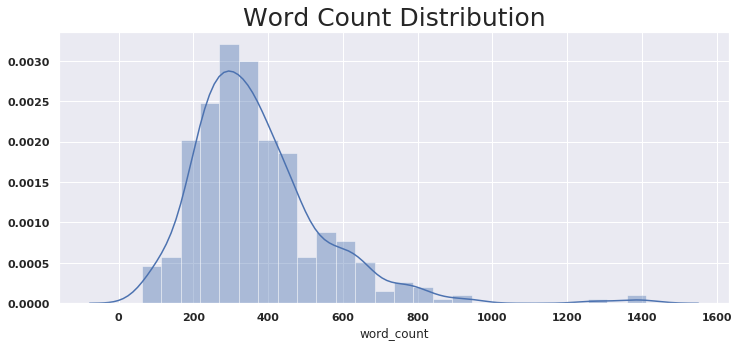

In [18]:
plt.figure(figsize = (12,5))
sns.distplot(df_ML['word_count'])
plt.title('Word Count Distribution', size = 25);

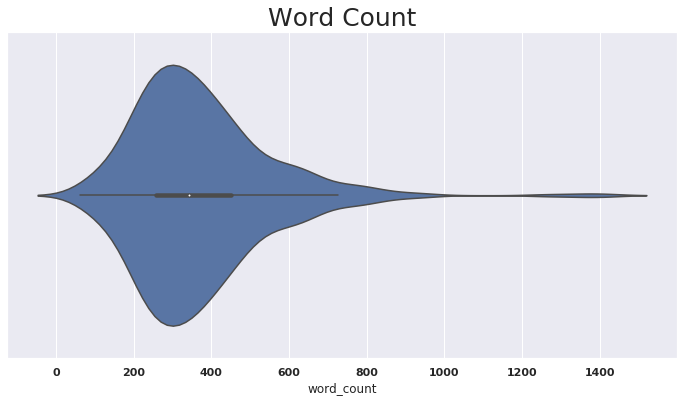

In [19]:
plt.figure(figsize = (12, 6));
sns.violinplot(df_ML["word_count"])
plt.title('Word Count', size = 25);

## Sentence Count

In [20]:
# obtains sentence count for each indiviual job description
df_ML['sentence_count'] = df_ML.sentence_tokenized.str.len()

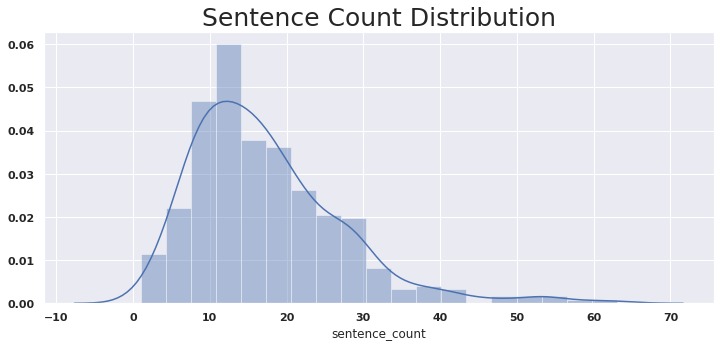

In [21]:
plt.figure(figsize = (12,5))
sns.distplot(df_ML['sentence_count'])
plt.title('Sentence Count Distribution', size = 25);

## Descriptive Statistics

In [22]:
df_ML.describe()

,word_count,sentence_count
count,373.000000,373.000000
mean,372.034853,17.348525
std,178.894474,9.881379
min,62.000000,1.000000
25%,257.000000,10.000000
50%,342.000000,15.000000
75%,451.000000,22.000000
max,1411.000000,63.000000


In [23]:
# generate lemmatized corpus for counting frequent words
lemma_corpus = []
for row in df_ML.clean_word_lemmatized:
    lemma_corpus += row

len(lemma_corpus)

88367

## Frequent Words 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

(-0.5, 399.5, 199.5, -0.5)

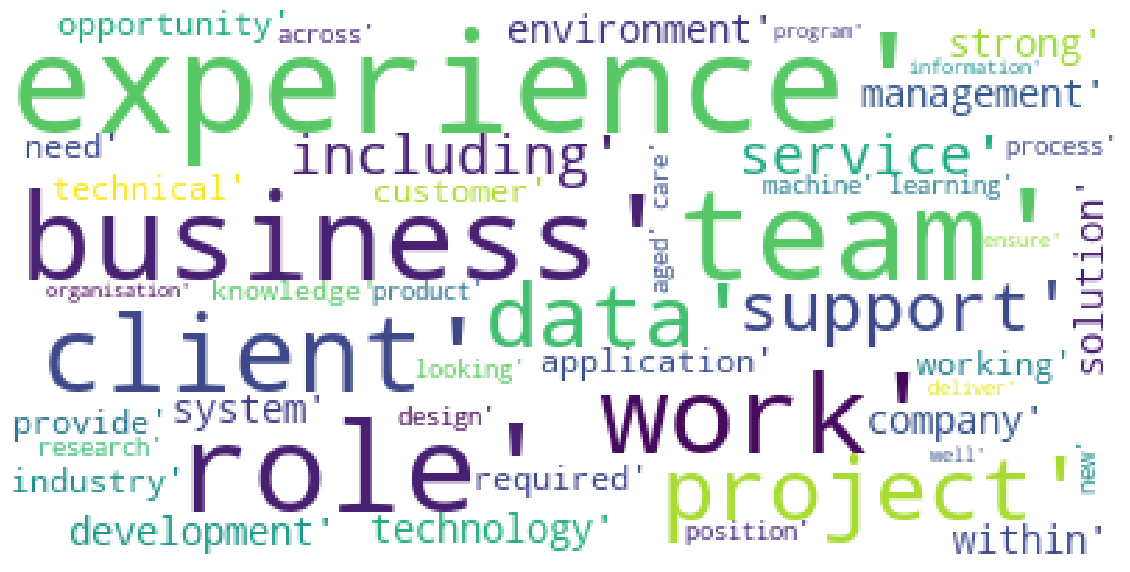

In [25]:
lemme_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50,
                          min_font_size = 6,
                          random_state=42
                         ).generate(str(lemma_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(lemme_wordcloud)
plt.axis('off')

In [26]:
import pandas as pd
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lemma_corpus)
top_df_ML = pd.DataFrame(top_words)
top_df_ML.columns=["Word", "Freq"]
top_df_ML.head(10)

,Word,Freq
0,experience,1200
1,team,863
2,work,798
3,data,784
4,role,682
5,business,675
6,skill,587
7,opportunity,514
8,working,503
9,project,436


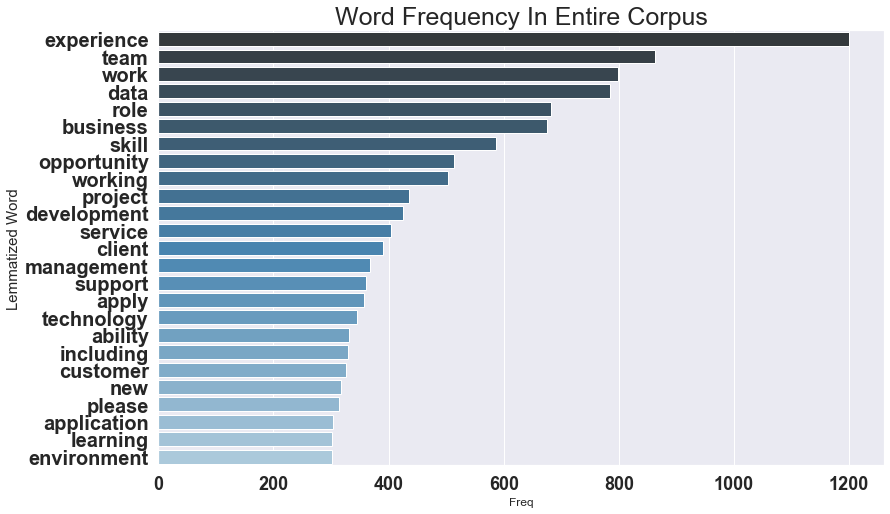

In [35]:
#Barplot of most freq words
lemma_bar = sns.barplot(y = "Word", x = "Freq", data = top_df_ML[:25], palette = "Blues_d", orient = 'h')
lemma_bar.set_yticklabels(lemma_bar.get_yticklabels(), fontsize = 20);
plt.title('Word Frequency In Entire Corpus', size=25)
plt.ylabel('Lemmatized Word', size = 15)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)

## N-grams

### Bigrams

In [28]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [29]:
# corpus with stopwords removed and list joined for n-gram distinction
ngram_corpus = df_ML.clean_word_lemmatized.str.join(' ')

In [30]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df_ML = pd.DataFrame(top2_words)
top2_df_ML.columns=["Bi-gram", "Freq"]

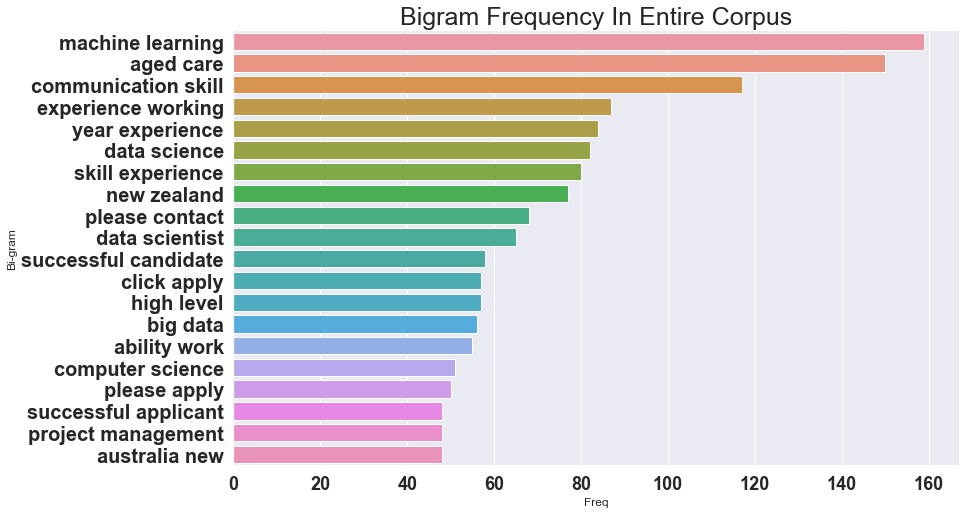

In [31]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
bbar = sns.barplot(y ="Bi-gram", x ="Freq", orient = 'h', data = top2_df_ML[:20])
plt.title('Bigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 20);
plt.savefig('bigram_bar.png', dpi=200)

### Trigrams

In [32]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [33]:
top3_words = get_top_n3_words(ngram_corpus, n = len(ngram_corpus))
top3_df_ML = pd.DataFrame(top3_words)
top3_df_ML.columns = ["Tri-gram", "Freq"]

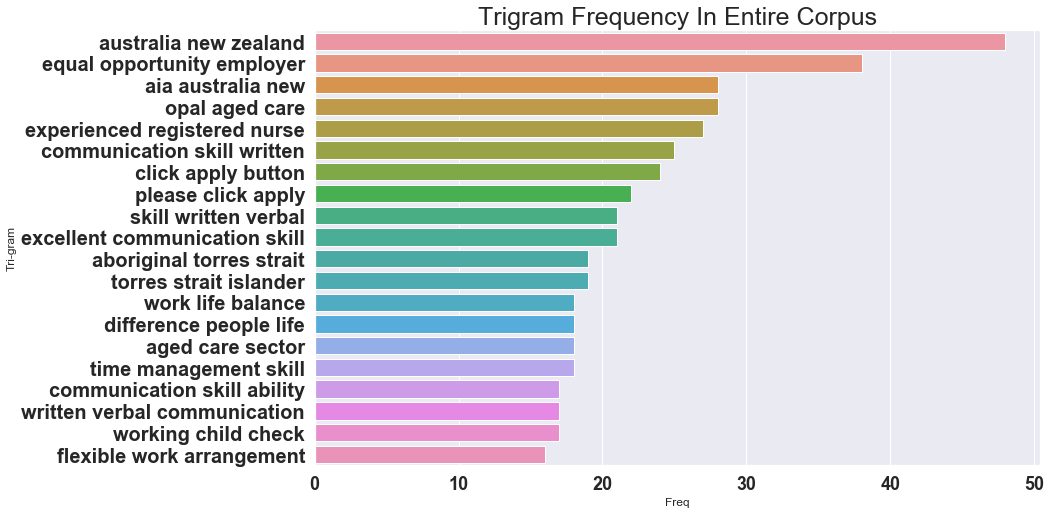

In [34]:
#Barplot of most freq Tri-grams
plt.tight_layout()
sns.set(rc={'figure.figsize':(13,8)})
tbar = sns.barplot(y = "Tri-gram", x = "Freq", orient = 'h', data = top3_df_ML[:20])
plt.title('Trigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
tbar.set_yticklabels(tbar.get_yticklabels(), fontsize = 20);
plt.savefig('trigram_bar.png', dpi=200)